#**DATA606 Capstone Project**
**Group member:**<br>
Siyu Ma<br>Sandra Pinto<br> Shruthi Boban

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (9, 7)
plt.rcParams['font.size'] = 14

In [2]:
!pip install xport

In [3]:
import xport.v56

## Uploading datasets from local file system

Link of Github: https://github.com/DATA606Project-TeamS/CapstoneProject-ObesityandML <br>
Link of zipped datasets in Github: https://github.com/DATA606Project-TeamS/CapstoneProject-ObesityandML/blob/main/Archive.zip

Download datasets to local system and upload to google colab using the code below:

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving P_DPQ.XPT to P_DPQ.XPT
Saving P_SLQ.XPT to P_SLQ.XPT
Saving P_PAQ.XPT to P_PAQ.XPT
Saving P_DIQ.XPT to P_DIQ.XPT
Saving P_BMX.XPT to P_BMX.XPT
Saving P_DEMO.XPT to P_DEMO.XPT
User uploaded file "P_DPQ.XPT" with length 791280 bytes
User uploaded file "P_SLQ.XPT" with length 777200 bytes
User uploaded file "P_PAQ.XPT" with length 1321440 bytes
User uploaded file "P_DIQ.XPT" with length 3361520 bytes
User uploaded file "P_BMX.XPT" with length 2520640 bytes
User uploaded file "P_DEMO.XPT" with length 3614720 bytes


### **Demographic Variables and Sample Weights (P_DEMO) Dataset**
---


SEQN - Respondent sequence number<br>
RIAGENDR - Gender<br>
  - 1: Male
  - 2: Female<br>
  - .: Missing<br>

RIDAGEYR - Age in years at screening<br>
  - 0 to 79: Range of values
  - 80: 80 years and over
  - .: missing<br>

RIDRETH3 - Race/Hispanic origin<br>
   - 1: Mexican American
   - 2: Other Hispanic
   - 3: None-Hispanic White
   - 4: None-Hispanic Black
   - 6: None-Hispanic Asian
   - 7: Other Race - Including Multi-Racial
   - .: Missing<br>

DMDBORN4 - Country of birth<br>
  - 1: Born in 50 US states or Washinton, DC
  - 2: Others
  - 77: Refused
  - 99: Don't Know
  - .: Missing
  <br>

DMDEDUC2 - Education level - Adults 20+<br>
  - 1: Less than 9th grade
  - 2: 9-11th grade(Includes 12th grade with no diploma)
  - 3: High School graduate/GED or equivalent
  - 4: Some college or AA degree
  - 5: College graduate or above
  - 7: Refused
  - 9 :Don't know
  - .: Missing<br>

INDFMPIR - Ratio of family income to poverty
  - 0 to 4.98: Range of values
  - 5: Value greater than or equal to 5.00
  - .: Missing



In [5]:
# Demographic variables dataset
df_demo = pd.read_sas('/content/P_DEMO.XPT')
df_demo = df_demo[["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH3",
                   "DMDBORN4", "DMDEDUC2","INDFMPIR"]]
df_demo  

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00
...,...,...,...,...,...,...,...
15555,124818.0,1.0,40.0,4.0,1.0,5.0,3.82
15556,124819.0,1.0,2.0,4.0,1.0,NaN,0.07
15557,124820.0,2.0,7.0,3.0,1.0,NaN,1.22
15558,124821.0,1.0,63.0,4.0,1.0,2.0,3.71


## Body Measures (P_BMX) Dataset
---
SEQN - Respondent sequence number<br>
BMXWT - Weight (kg)<br>
  - 3.3 to 254.3: Range of Values
  - .: Missing<br>
  
BMXBMI - Body Mass Index (kg/m**2)<br>
  - 11.9 to 92.3: Range of Values
  - .: Missing<br>



In [6]:
# Body Measures dataset
df_bodymeasures = pd.read_sas('/content/P_BMX.XPT')
df_bodymeasures = df_bodymeasures[["SEQN", "BMXWT","BMXHT","BMXBMI"]]
df_bodymeasures

,SEQN,BMXWT,BMXHT,BMXBMI
0,109263.0,NaN,NaN,NaN
1,109264.0,42.2,154.7,17.6
2,109265.0,12.0,89.3,15.0
3,109266.0,97.1,160.2,37.8
4,109269.0,13.6,NaN,NaN
...,...,...,...,...
14295,124818.0,108.8,168.7,38.2
14296,124819.0,15.4,93.7,17.5
14297,124820.0,22.9,123.3,15.1
14298,124821.0,79.5,176.4,25.5


## Diabetes(P_DIQ) Dataset

---
SEQN - Respondent sequence number<br>
DIQ010 - Doctor told you have diabetes<br>
  - 1: Yes
  - 2: No
  - 3: Boederline
  - 7: Refused
  - 9: Don't know
  - .: missing



In [7]:
# Diabetes dataset
df_diabetes = pd.read_sas('/content/P_DIQ.XPT')
df_diabetes = df_diabetes[["SEQN", "DIQ010"]]
df_diabetes

,SEQN,DIQ010
0,109263.0,2.0
1,109264.0,2.0
2,109265.0,2.0
3,109266.0,2.0
4,109267.0,2.0
...,...,...
14981,124818.0,2.0
14982,124819.0,2.0
14983,124820.0,2.0
14984,124821.0,3.0


## Physical activity(P_OAQ.XPT) dataset

---
SEQN - Respondent sequence number<br>
PAQ620 - Moderate work activity
  - 1: Yes
  - 2: No
  - 7: Refused
  - 9: Don't know
  - .: missing<br>

PAQ665 - Moderate recreational activities
  - 1: Yes
  - 2: No
  - 7: Refused
  - 9: Don't know
  - .: missing<br>

In [8]:
# Physical activity dataset
df_activity = pd.read_sas('/content/P_PAQ.XPT')
df_activity = df_activity[["SEQN", "PAQ620", "PAQ665"]]
df_activity

,SEQN,PAQ620,PAQ665
0,109266.0,2.0,1.0
1,109267.0,2.0,2.0
2,109268.0,1.0,2.0
3,109271.0,1.0,2.0
4,109273.0,2.0,1.0
...,...,...,...
9688,124815.0,2.0,1.0
9689,124817.0,2.0,2.0
9690,124818.0,2.0,2.0
9691,124821.0,2.0,2.0


## Mental health dataset

---
DPQ020 - Feeling down, depressed, or hopeless<br>
  - 0: Not at all
  - 1: Several days
  - 2: More than half the days
  - 3: Nearly every day
  - 7: Refused
  - 9: Don't know
  - .: Missing<br>

DPQ050 - Poor appetite or overeating<br>
  - 0: Not at all
  - 1: Several days
  - 2: More than half the days
  - 3: Nearly every day
  - 7: Refused
  - 9: Don't know
  - .: Missing<br>


In [9]:
# Mental Health(P_DPQ.XPT) dataset
df_mentalhealth = pd.read_sas('/content/P_DPQ.XPT')

df_mentalhealth = df_mentalhealth[["SEQN","DPQ020","DPQ050"]]
df_mentalhealth

,SEQN,DPQ020,DPQ050
0,109266.0,5.397605e-79,5.397605e-79
1,109271.0,1.000000e+00,5.397605e-79
2,109273.0,2.000000e+00,2.000000e+00
3,109274.0,5.397605e-79,5.397605e-79
4,109282.0,1.000000e+00,5.397605e-79
...,...,...,...
8960,124815.0,5.397605e-79,5.397605e-79
8961,124817.0,1.000000e+00,5.397605e-79
8962,124818.0,5.397605e-79,5.397605e-79
8963,124821.0,5.397605e-79,5.397605e-79


## Sleep Disorders dataset

---
SLD012 - Sleep hours - weekdays or workdays
  - 3 to 13.5: Range of values
  - 2: Less than 3 hours
  - 14: 14 hours or more
  - .: Missing
<br>

SLD013 - Sleep hours - weekends
  - 3 to 13.5: Range of values
  - 2: Less than 3 hours
  - 14: 14 hours or more
  - .: Missing
<br>

In [10]:
# Sleep disorders dataset
df_sleepdisorder = pd.read_sas('/content/P_SLQ.XPT')
df_sleepdisorder= df_sleepdisorder[["SEQN","SLD012","SLD013"]]
df_sleepdisorder

,SEQN,SLD012,SLD013
0,109266.0,7.5,8.0
1,109267.0,8.0,8.0
2,109268.0,8.5,8.0
3,109271.0,10.0,13.0
4,109273.0,6.5,8.0
...,...,...,...
10190,124815.0,6.0,6.0
10191,124817.0,8.0,8.0
10192,124818.0,6.0,7.0
10193,124821.0,8.0,9.0


## Merge datasets

In [11]:
df_demo.head(), df_bodymeasures.head(), df_diabetes.head(), df_activity.head(), df_mentalhealth.head(), df_sleepdisorder.head()


(       SEQN  RIAGENDR  RIDAGEYR  RIDRETH3  DMDBORN4  DMDEDUC2  INDFMPIR
 0  109263.0       1.0       2.0       6.0       1.0       NaN      4.66
 1  109264.0       2.0      13.0       1.0       1.0       NaN      0.83
 2  109265.0       1.0       2.0       3.0       1.0       NaN      3.06
 3  109266.0       2.0      29.0       6.0       2.0       5.0      5.00
 4  109267.0       2.0      21.0       2.0       2.0       4.0      5.00,
        SEQN  BMXWT  BMXHT  BMXBMI
 0  109263.0    NaN    NaN     NaN
 1  109264.0   42.2  154.7    17.6
 2  109265.0   12.0   89.3    15.0
 3  109266.0   97.1  160.2    37.8
 4  109269.0   13.6    NaN     NaN,
        SEQN  DIQ010
 0  109263.0     2.0
 1  109264.0     2.0
 2  109265.0     2.0
 3  109266.0     2.0
 4  109267.0     2.0,
        SEQN  PAQ620  PAQ665
 0  109266.0     2.0     1.0
 1  109267.0     2.0     2.0
 2  109268.0     1.0     2.0
 3  109271.0     1.0     2.0
 4  109273.0     2.0     1.0,
        SEQN        DPQ020        DPQ050
 0  109

In [12]:
merged1 = pd.merge(df_demo,df_bodymeasures, on='SEQN', how='outer')
merged1.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR,BMXWT,BMXHT,BMXBMI
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN


In [13]:
merged2 = pd.merge(merged1, df_diabetes, how='outer')
merged2.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR,BMXWT,BMXHT,BMXBMI,DIQ010
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,2.0
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN,2.0


In [14]:
merged3 = pd.merge(merged2, df_activity, how='outer')
merged3.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR,BMXWT,BMXHT,BMXBMI,DIQ010,PAQ620,PAQ665
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,2.0,NaN,NaN
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0,NaN,NaN
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0,NaN,NaN
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0,2.0,1.0
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN,2.0,2.0,2.0


In [15]:
merged4 = pd.merge(merged3, df_mentalhealth, how='outer')
merged4.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR,BMXWT,BMXHT,BMXBMI,DIQ010,PAQ620,PAQ665,DPQ020,DPQ050
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0,NaN,NaN,NaN,NaN
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0,NaN,NaN,NaN,NaN
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0,2.0,1.0,5.397605e-79,5.397605e-79
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN


In [16]:
df_final = pd.merge(merged4, df_sleepdisorder, how='outer')

In [17]:
# rename the columns
df_tidy = df_final.rename(columns = {'SEQN':'SEQN','RIAGENDR':'Gender','RIDAGEYR':'Age','RIDRETH3':'Race',
                               'DMDBORN4':'CountryofBirth','DMDEDUC2':'Education',
                               'INDFMPIR':'FamIncomeRatio', 'BMXWT':'Weight','BMXHT':'Height',
                               'BMXBMI':'BMI','DIQ010':'Diabetes',
                               'PAQ620':'ModerateWorkActivity','PAQ665':'ModerateRecreationalActivities',
                               'DPQ020':'Depressed', 'DPQ050':'PoorAppetiteOvereating',
                               'SLD012':'SleepHoursWeekdays', 'SLD013':'SleepHoursWeekend'}, inplace = False)

In [18]:
df_tidy.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,SleepHoursWeekdays,SleepHoursWeekend
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0,2.0,1.0,5.397605e-79,5.397605e-79,7.5,8.0
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,8.0,8.0


In [19]:
# checking data info
df_tidy.describe(include = 'all')

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,SleepHoursWeekdays,SleepHoursWeekend
count,15560.00000,15560.000000,1.556000e+04,15560.000000,15560.000000,9232.000000,1.335900e+04,14075.00000,13157.000000,13137.000000,14986.000000,9693.000000,9693.000000,8.306000e+03,8.305000e+03,10105.000000,10099.000000
mean,117042.50000,1.503792,3.374248e+01,3.486118,1.230206,3.551993,2.405937e+00,65.42638,156.490188,26.656847,1.926265,1.573094,1.598679,3.727426e-01,4.096328e-01,7.640920,8.361768
std,4491.92943,0.500002,2.532053e+01,1.622734,1.728083,1.214109,1.634346e+00,33.33188,22.621413,8.419842,0.368923,0.533974,0.501840,7.581775e-01,8.190316e-01,1.682628,1.824088
min,109263.00000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79,3.20000,78.300000,11.900000,1.000000,1.000000,1.000000,5.397605e-79,5.397605e-79,2.000000,2.000000
25%,113152.75000,1.000000,1.000000e+01,3.000000,1.000000,3.000000,1.020000e+00,42.30000,151.100000,20.400000,2.000000,1.000000,1.000000,5.397605e-79,5.397605e-79,7.000000,7.000000
50%,117042.50000,2.000000,3.000000e+01,3.000000,1.000000,4.000000,1.960000e+00,68.10000,162.100000,25.800000,2.000000,2.000000,2.000000,5.397605e-79,5.397605e-79,7.500000,8.000000
75%,120932.25000,2.000000,5.600000e+01,4.000000,1.000000,4.000000,3.880000e+00,86.30000,171.300000,31.400000,2.000000,2.000000,2.000000,1.000000e+00,1.000000e+00,8.500000,9.500000
max,124822.00000,2.000000,8.000000e+01,7.000000,99.000000,9.000000,5.000000e+00,254.30000,199.600000,92.300000,9.000000,9.000000,9.000000,9.000000e+00,9.000000e+00,14.000000,14.000000


In [20]:
# dataframe size
df_tidy.shape

(15560, 17)

## Clean Data

#### Complete or delete missing values in datasets

In [21]:
df_tidy.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,SleepHoursWeekdays,SleepHoursWeekend
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0,2.0,1.0,5.397605e-79,5.397605e-79,7.5,8.0
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,8.0,8.0


In [22]:
df_tidy.isnull().sum()

SEQN                                 0
Gender                               0
Age                                  0
Race                                 0
CountryofBirth                       0
Education                         6328
FamIncomeRatio                    2201
Weight                            1485
Height                            2403
BMI                               2423
Diabetes                           574
ModerateWorkActivity              5867
ModerateRecreationalActivities    5867
Depressed                         7254
PoorAppetiteOvereating            7255
SleepHoursWeekdays                5455
SleepHoursWeekend                 5461
dtype: int64

In [23]:
df_clean = df_tidy.dropna(subset=['BMI'])
df_clean

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,SleepHoursWeekdays,SleepHoursWeekend
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0,2.0,1.0,5.397605e-79,5.397605e-79,7.5,8.0
7,109270.0,2.0,11.0,4.0,1.0,NaN,1.88,75.3,156.0,30.9,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8,109271.0,1.0,49.0,3.0,1.0,2.0,NaN,98.8,182.3,29.7,2.0,1.0,2.0,1.000000e+00,5.397605e-79,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,1.0,40.0,4.0,1.0,5.0,3.82,108.8,168.7,38.2,2.0,2.0,2.0,5.397605e-79,5.397605e-79,6.0,7.0
15556,124819.0,1.0,2.0,4.0,1.0,NaN,0.07,15.4,93.7,17.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820.0,2.0,7.0,3.0,1.0,NaN,1.22,22.9,123.3,15.1,2.0,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821.0,1.0,63.0,4.0,1.0,2.0,3.71,79.5,176.4,25.5,3.0,2.0,2.0,5.397605e-79,5.397605e-79,8.0,9.0


In [24]:
df_clean.shape

(13137, 17)

In [25]:
# checking data types
display(df_clean.dtypes)

SEQN                              float64
Gender                            float64
Age                               float64
Race                              float64
CountryofBirth                    float64
Education                         float64
FamIncomeRatio                    float64
Weight                            float64
Height                            float64
BMI                               float64
Diabetes                          float64
ModerateWorkActivity              float64
ModerateRecreationalActivities    float64
Depressed                         float64
PoorAppetiteOvereating            float64
SleepHoursWeekdays                float64
SleepHoursWeekend                 float64
dtype: object

In [26]:
# Converting 'SEQN', 'Gender', 'Race', 'CountryifBirth', 'Diabetes' from float to int
df_clean = df_clean.astype({
    'SEQN':'int', 'Gender':'int', 'Age':'int', 'Race':'int', 'CountryofBirth':'int', 
    'Diabetes':'int'
    })

## Change values from numbers to specific categories

In [27]:
df_clean.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,SleepHoursWeekdays,SleepHoursWeekend
1,109264,2,13,1,1,NaN,0.83,42.2,154.7,17.6,2,NaN,NaN,NaN,NaN,NaN,NaN
2,109265,1,2,3,1,NaN,3.06,12.0,89.3,15.0,2,NaN,NaN,NaN,NaN,NaN,NaN
3,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,7.5,8.0
7,109270,2,11,4,1,NaN,1.88,75.3,156.0,30.9,2,NaN,NaN,NaN,NaN,NaN,NaN
8,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,10.0,13.0


## Visualization

#### Histogram

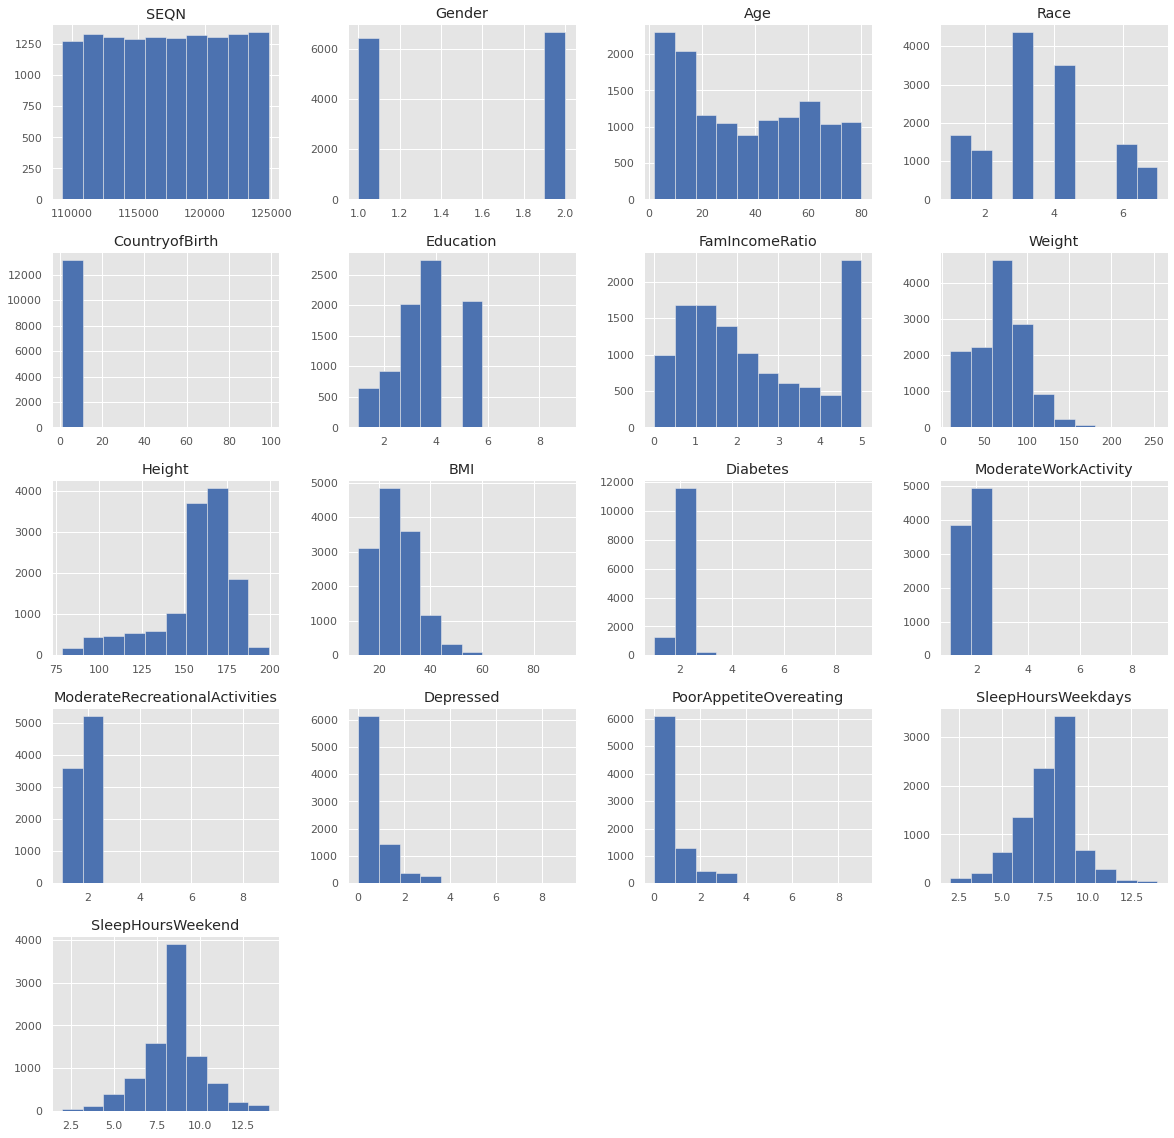

In [28]:
# Histogram shows the data distribution
p = df_clean.hist(figsize=(20,20),color='b')

#### Correlation of the dataset

In [29]:
# Extract the columns with numerical data values
df_numerical = df_clean[["BMI", "Age","FamIncomeRatio","Weight","Height","SleepHoursWeekdays","SleepHoursWeekend"]]

In [30]:
# Print the correlation between each numerical columns
df_numerical.corr()

,BMI,Age,FamIncomeRatio,Weight,Height,SleepHoursWeekdays,SleepHoursWeekend
BMI,1.000000,0.463421,0.025979,0.918685,0.497334,-0.066224,-0.055826
Age,0.463421,1.000000,0.145589,0.532463,0.538608,-0.004612,-0.170679
FamIncomeRatio,0.025979,0.145589,1.000000,0.086580,0.137814,-0.062773,-0.044770
Weight,0.918685,0.532463,0.086580,1.000000,0.769794,-0.084741,-0.082710
Height,0.497334,0.538608,0.137814,0.769794,1.000000,-0.058676,-0.074864
SleepHoursWeekdays,-0.066224,-0.004612,-0.062773,-0.084741,-0.058676,1.000000,0.540959
SleepHoursWeekend,-0.055826,-0.170679,-0.044770,-0.082710,-0.074864,0.540959,1.000000


In [31]:
# Check correlations between numerical variables with BMI
df_numerical.corr()['BMI'].sort_values()

SleepHoursWeekdays   -0.066224
SleepHoursWeekend    -0.055826
FamIncomeRatio        0.025979
Age                   0.463421
Height                0.497334
Weight                0.918685
BMI                   1.000000
Name: BMI, dtype: float64

#### Heat Map for Numerical Data

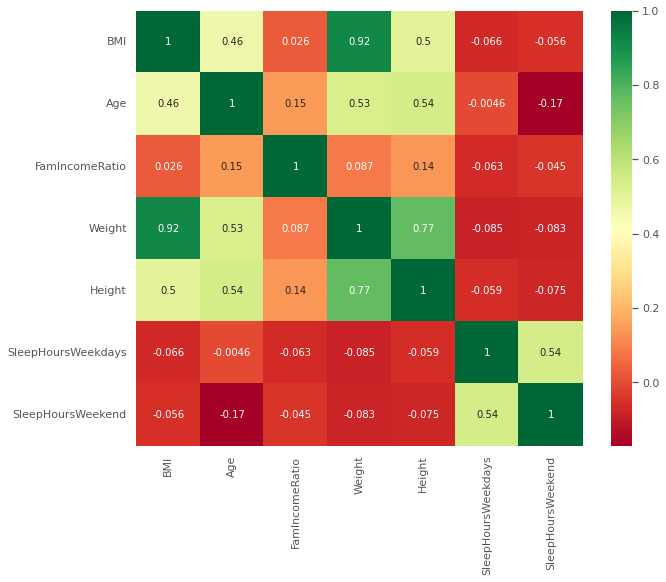

In [32]:
plt.figure(figsize=(10,8))
p = sns.heatmap(df_numerical.corr(), annot=True, cmap='RdYlGn')
plt.show()

## Age and age groups

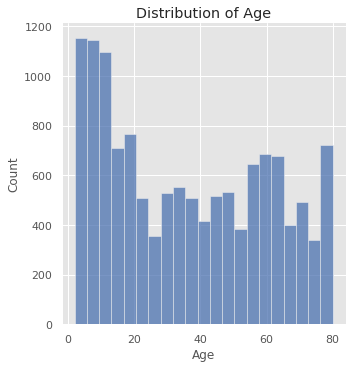

In [33]:
# Distribution of Age
sns.displot(df_clean['Age'],color='b')
plt.title("Distribution of Age")
plt.show()

#### Creating a new column for age groups

In [34]:
ages = pd.DataFrame(df_clean[['SEQN', 'Age']])

bins = [0, 3, 12, 19, 60, 120]
labels = ['0-3', '3-12', '13-19', '20-60', '60+']
ages['AgeGroup'] = pd.cut(ages.Age, bins, labels = labels, include_lowest= True)
df_age_groups = ages
df_age_groups

,SEQN,Age,AgeGroup
1,109264,13,13-19
2,109265,2,0-3
3,109266,29,20-60
7,109270,11,3-12
8,109271,49,20-60
...,...,...,...
15555,124818,40,20-60
15556,124819,2,0-3
15557,124820,7,3-12
15558,124821,63,60+


#### **Based on the EDA and visualization, we are going to mainly focus on the age group feom 20-60.**

In [35]:
df_with_age_groups = pd.merge(df_clean, df_age_groups, how='outer')

In [36]:
df_with_age_groups.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,SleepHoursWeekdays,SleepHoursWeekend,AgeGroup
0,109264,2,13,1,1,NaN,0.83,42.2,154.7,17.6,2,NaN,NaN,NaN,NaN,NaN,NaN,13-19
1,109265,1,2,3,1,NaN,3.06,12.0,89.3,15.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0-3
2,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,7.5,8.0,20-60
3,109270,2,11,4,1,NaN,1.88,75.3,156.0,30.9,2,NaN,NaN,NaN,NaN,NaN,NaN,3-12
4,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,10.0,13.0,20-60


## Visualization of BMI
#### According to CDC, "for adults 20 years old and older, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages."
---
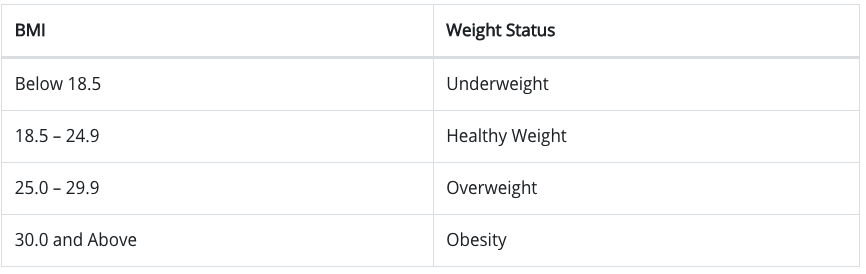


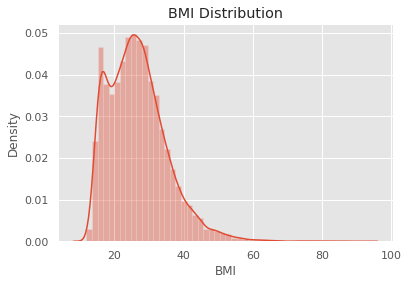

In [37]:
sns.distplot(df_with_age_groups["BMI"])
plt.title("BMI Distribution")
plt.show()

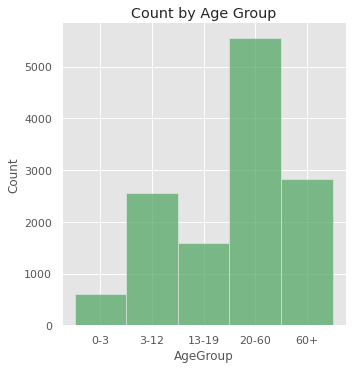

In [89]:
sns.displot(df_with_age_groups['AgeGroup'],color='g',height=5)
plt.title("Count by Age Group")
plt.show()

## BMI and Age Groups

In [39]:
# check BMI and age group
df_BMI_AgeGroup = df_with_age_groups[["BMI","AgeGroup"]]
df_BMI_AgeGroup.head()

,BMI,AgeGroup
0,17.6,13-19
1,15.0,0-3
2,37.8,20-60
3,30.9,3-12
4,29.7,20-60


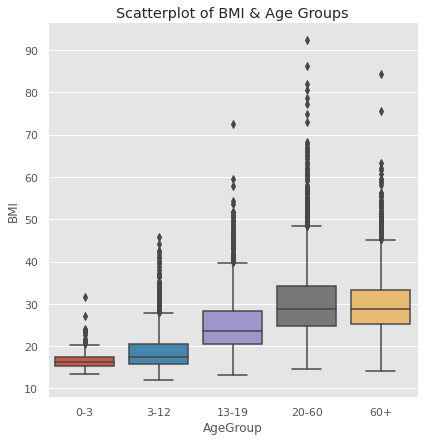

In [88]:
sns.catplot(x="AgeGroup", y='BMI', kind='box', data=df_with_age_groups, height=6)
plt.title('Scatterplot of BMI & Age Groups')
plt.show()
# box plot

#### - Since the visualizations showed that the age group of 20-60 contains the majority of the data, and education, income ratio, mental health, and other factors showed more resonable relation for adults. We decided focus on respondent from 20-60. And expend the project to childhood obesity/overweight and senior(60+) obesity/overweight later on.

## Reorganizing the age groups
Conduct all the analysis again

In [74]:
# 20-29, 30-39, 40-49, 50-60
ages = pd.DataFrame(df_with_age_groups[['SEQN', 'Age']])

bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-60']
ages['AgeGroup1'] = pd.cut(ages.Age, bins, labels = labels, include_lowest= True)
df_20_60 = ages

# Drop NaN values, so we only left with people from 20-60.
df_20_60.dropna()

,SEQN,Age,AgeGroup1
2,109266,29,20-29
4,109271,49,40-49
5,109273,36,30-39
13,109284,44,40-49
15,109286,33,30-39
...,...,...,...
13124,124809,23,20-29
13125,124810,56,50-60
13128,124813,43,40-49
13130,124815,52,50-60


In [75]:
df4 = pd.merge(df_clean, df_20_60, how="left")
df5 = df4.dropna()

In [76]:
df5.isnull().sum()

SEQN                              0
Gender                            0
Age                               0
Race                              0
CountryofBirth                    0
Education                         0
FamIncomeRatio                    0
Weight                            0
Height                            0
BMI                               0
Diabetes                          0
ModerateWorkActivity              0
ModerateRecreationalActivities    0
Depressed                         0
PoorAppetiteOvereating            0
SleepHoursWeekdays                0
SleepHoursWeekend                 0
AgeGroup1                         0
dtype: int64

In [78]:
df5.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,SleepHoursWeekdays,SleepHoursWeekend,AgeGroup1
2,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,7.5,8.0,20-29
5,109273,1,36,3,1,4.0,0.83,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,6.5,8.0,30-39
21,109292,1,58,2,1,3.0,1.60,86.0,167.8,30.5,1,2.0,2.0,3.000000e+00,5.397605e-79,4.5,4.5,50-60
22,109293,1,44,3,1,3.0,0.02,99.4,181.6,30.1,2,1.0,2.0,1.000000e+00,1.000000e+00,7.5,6.5,40-49
23,109295,2,54,1,2,1.0,5.00,61.7,157.4,24.9,2,2.0,2.0,5.397605e-79,5.397605e-79,7.0,7.0,50-60


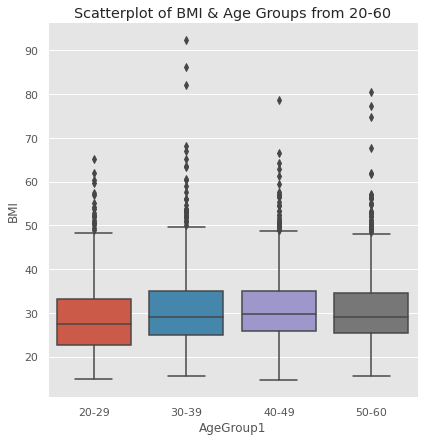

In [91]:
# box plot of Age groups from 20-60 years old(ten years for each sub group)
sns.catplot(x="AgeGroup1", y='BMI', kind='box', data=df5, height=6)
plt.title('Scatterplot of BMI & Age Groups from 20-60')
plt.show()


## BMI and Gender

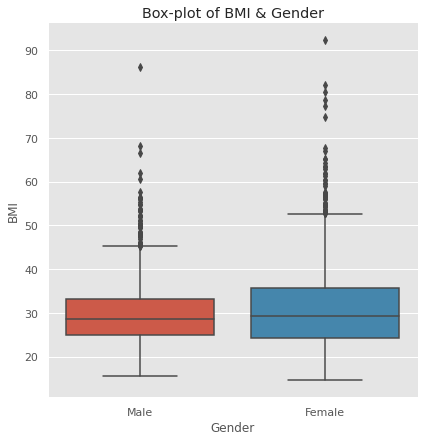

In [93]:
b = sns.catplot(x="Gender", y="BMI", data=df5, height=6, kind='box')
plt.xticks([0, 1],['Male','Female'])
plt.title('Box-plot of BMI & Gender')
plt.show()

## BMI and Race

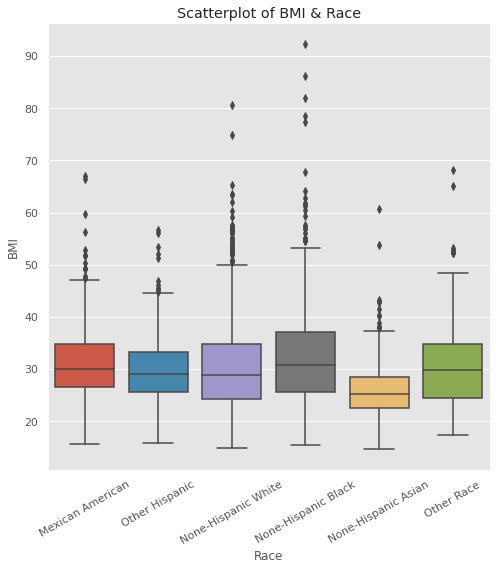

In [97]:
sns.catplot(x="Race", y='BMI', data=df5, kind='box', height=7)
plt.title('Scatterplot of BMI & Race')
plt.xticks([0, 1, 2, 3, 4, 5],['Mexican American', 'Other Hispanic',
                                  'None-Hispanic White', 'None-Hispanic Black',
                                  'None-Hispanic Asian', 'Other Race'], rotation=30)
plt.show()

## BMI and Country of Birth

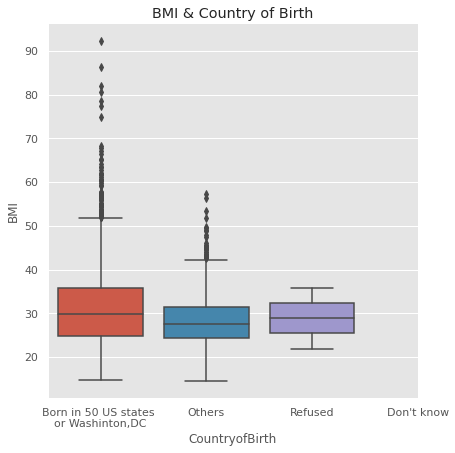

In [99]:
sns.catplot(data=df5, x="CountryofBirth", y="BMI", kind='box', height=6)
plt.title("BMI & Country of Birth")
plt.xticks([0,1,2,3],['Born in 50 US states \nor Washinton,DC', 'Others', 'Refused', "Don't know"])
plt.show()

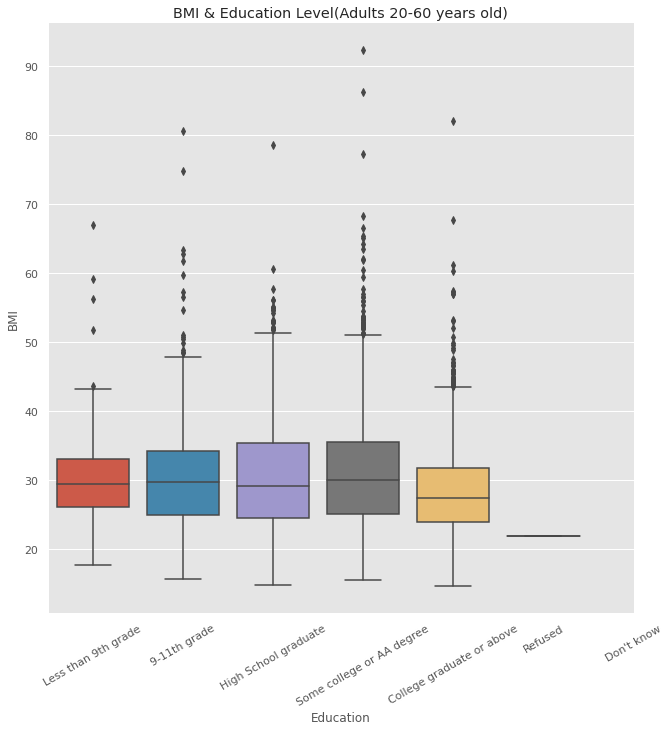

In [105]:
## BMI and Education Level
sns.catplot(data=df5, x="Education", y="BMI", kind='box', height=9)
plt.title("BMI & Education Level(Adults 20-60 years old)")
plt.xticks([0,1,2,3,4,5,6],['Less than 9th grade','9-11th grade','High School graduate',
                            'Some college or AA degree','College graduate or above',
                            'Refused',"Don't know"], rotation=30)
plt.show()

# 

0: Not at all
1: Several days
2: More than half the days
3: Nearly every day
7: Refused
9: Don't know
.: Missing

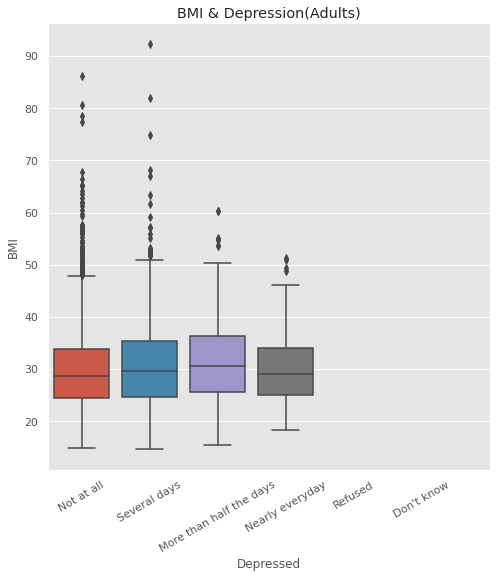

In [106]:
# BMI and Depression
sns.catplot(data=df5, x="Depressed", y="BMI", kind='box', height=7)
plt.title("BMI & Depression(Adults)")
plt.xticks([0,1,2,3,4,5,6],['Not at all','Several days','More than half the days','Nearly everyday','Refused',"Don't know"], rotation=30)
plt.show()

### Trying to factorize categorical data and find correlation

In [61]:
labels, categories = pd.factorize(df5["AgeGroup1"])
df5["labels"] = labels
abs(df5["BMI"].corr(df5["labels"]))

0.054509247944536605

# **Model Construction**

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
df1 = df_with_age_groups.dropna()
df1

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,SleepHoursWeekdays,SleepHoursWeekend,AgeGroup
2,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,7.5,8.0,20-60
5,109273,1,36,3,1,4.0,0.83,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,6.5,8.0,20-60
6,109274,1,68,7,1,4.0,1.20,103.7,185.3,30.2,1,1.0,1.0,5.397605e-79,5.397605e-79,9.5,9.5,60+
12,109282,1,76,3,1,5.0,3.61,83.3,177.1,26.6,2,2.0,2.0,1.000000e+00,5.397605e-79,7.0,8.0,60+
19,109290,2,68,4,1,5.0,5.00,73.0,161.2,28.1,1,1.0,1.0,1.000000e+00,5.397605e-79,4.0,4.0,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13129,124814,1,64,4,1,3.0,2.00,114.3,174.5,37.5,2,2.0,2.0,5.397605e-79,5.397605e-79,8.0,7.0,60+
13130,124815,1,52,4,1,4.0,5.00,94.3,178.8,29.5,2,2.0,1.0,5.397605e-79,5.397605e-79,6.0,6.0,20-60
13131,124817,2,67,1,2,2.0,2.19,82.8,147.8,37.9,1,2.0,2.0,1.000000e+00,5.397605e-79,8.0,8.0,60+
13132,124818,1,40,4,1,5.0,3.82,108.8,168.7,38.2,2,2.0,2.0,5.397605e-79,5.397605e-79,6.0,7.0,20-60


In [ ]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# SVM
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)